In [23]:
!pip install tabulate
import ast
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
import seaborn as sns


In [24]:
# Read the contents of the file into a list
with open('output/ether_category_time.txt', 'r') as file:
    contents = file.readlines()

# Convert the list to a DataFrame
df = pd.DataFrame(eval(contents[0]))
df[['Type','Month/Year']] = pd.DataFrame(df[0].tolist(), index= df.index)
# Print the resulting DataFrame
df = df.iloc[:, 1:]
df = df.rename(columns={1: 'Value'})
eth_val = df.pop('Value') 
df.insert(2, 'Value', eth_val)
df.head()

,Type,Month/Year,Value
0,Scamming,06/2018,2.744025e+21
1,Scamming,10/2017,1.843587e+21
2,Fake ICO,08/2017,1.811647e+20
3,Scamming,08/2018,1.190915e+21
4,Scamming,04/2018,2.591678e+21


In [25]:
df_sorted=df.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))
# df_sorted.head()

df_scam=df[df['Type'] == 'Scamming']
df_scam_sorted=df_scam.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_phishing=df[df['Type'] == 'Phishing']
df_phishing_sorted=df_phishing.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_fake_ico=df[df['Type'] == 'Fake ICO']
df_fake_ico_sorted=df_fake_ico.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_sorted.head(10)


,Type,Month/Year,Value
22,Phishing,05/2017,9.000000e+16
11,Scamming,06/2017,9.878410e+18
44,Phishing,06/2017,1.000000e+18
20,Fake ICO,06/2017,1.826740e+20
5,Scamming,07/2017,2.452982e+21
29,Fake ICO,07/2017,1.624220e+19
27,Phishing,07/2017,1.060149e+22
2,Fake ICO,08/2017,1.811647e+20
37,Scamming,08/2017,3.016474e+19
6,Phishing,08/2017,1.417513e+22


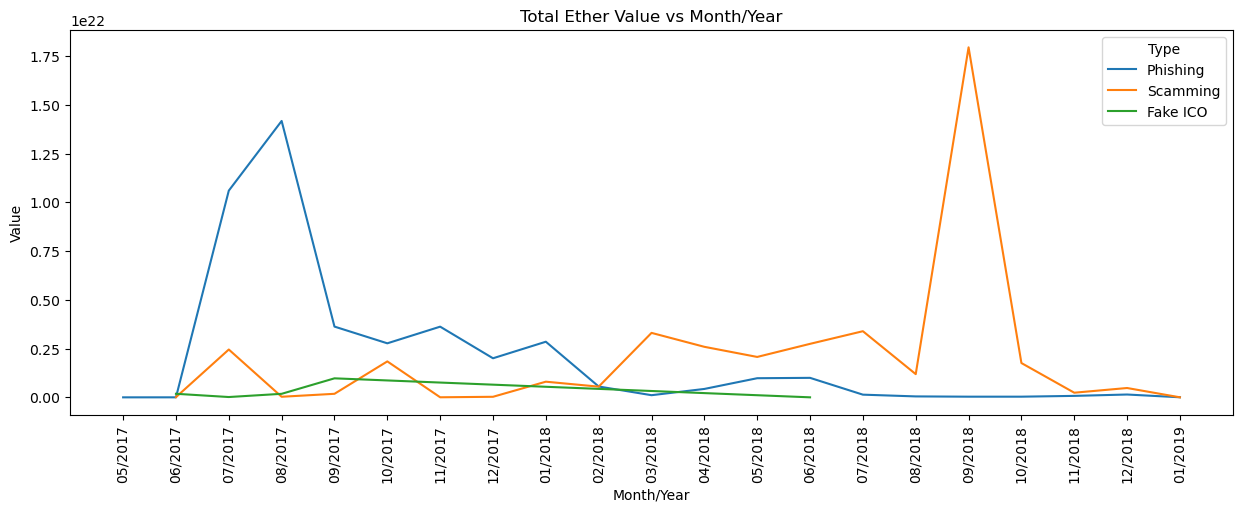

In [26]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Month/Year', y='Value', hue='Type', data=df_sorted)

# add labels and title
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Total Ether Value vs Month/Year')
plt.xticks(rotation=90)
plt.savefig('output/ether_time.png',  bbox_inches='tight')
plt.show()

In [27]:
# Popular Scams

# Read the contents of the file into a list
with open('output/popular_scams.txt', 'r') as file:
    contents = file.readlines()

# Convert the list to a DataFrame
df = pd.DataFrame(eval(contents[0]))

df[['Scam ID','Type']] = pd.DataFrame(df[0].tolist(), index= df.index)

df = df.iloc[:, 1:]
df = df.rename(columns={1: 'Value'})
eth_val = df.pop('Value') 
df.insert(2, 'Value', eth_val)
df['Rank'] = df['Value'].rank(method='dense', ascending=False).astype(int)
df.head(100)

,Scam ID,Type,Value,Rank
0,5622,Scamming,1.670908e+22,1
1,2135,Phishing,6.583972e+21,2
2,90,Phishing,5.972590e+21,3
3,2258,Phishing,3.462808e+21,4
4,2137,Phishing,3.389914e+21,5
5,2132,Scamming,2.428075e+21,6
6,88,Phishing,2.067751e+21,7
7,2358,Scamming,1.835177e+21,8
8,2556,Phishing,1.803047e+21,9
9,1200,Phishing,1.630577e+21,10


In [28]:
import sys

with open('output/popular_scams.md', 'w') as f:
    sys.stdout = f
    print(tabulate(df, headers='keys', tablefmt="github", showindex=False))
    sys.stdout = sys.__stdout__

In [29]:
with open('output/category_ether.txt', 'r') as file:
    contents = file.readlines()

# Convert the list to a DataFrame
df_cat = pd.DataFrame(eval(contents[0]))
df_cat = df_cat.rename(columns={0: 'Type', 1: 'Value'})
df_cat['Rank'] = df_cat['Value'].rank(method='dense', ascending=False).astype(int)
df_cat.head()

,Type,Value,Rank
0,Phishing,4.321856e+22,1
1,Scamming,4.162699e+22,2
2,Fake ICO,1.356458e+21,3


In [30]:
import sys

with open('output/category_ether.md', 'w') as f:
    sys.stdout = f
    print(tabulate(df_cat, headers='keys', tablefmt="github", showindex=False))
    sys.stdout = sys.__stdout__